In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

<p><p/>

# Enzyme Stability Prediction

## 1. Data Exploration 

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [5]:
print ("Columns in data:", df.columns)
print ("Data dimensions:", df.shape)
print ("Data types: \n", df.dtypes)
print ("")
# print (df.protein_sequence.)

Columns in data: Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')
Data dimensions: (31390, 5)
Data types: 
 seq_id                int64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object



In [6]:
# Checking if there is missing data 
pd.isnull(df).sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [7]:
# checking if there are duplicates
df[['protein_sequence', 'pH', 'tm']].duplicated().sum()

58

In [8]:
df[['protein_sequence', 'pH', 'tm']].describe()

,pH,tm
count,31104.000000,31390.000000
mean,6.892339,49.147337
std,1.612225,14.010089
min,1.990000,-1.000000
25%,7.000000,42.100000
50%,7.000000,48.000000
75%,7.000000,53.800000
max,64.900000,130.000000


In [9]:
np.sort(df['pH'].unique())

array([ 1.99,  2.  ,  2.02,  2.03,  2.1 ,  2.2 ,  2.3 ,  2.34,  2.4 ,
        2.5 ,  2.53,  2.7 ,  2.8 ,  2.81,  2.83,  2.84,  2.86,  2.9 ,
        2.94,  2.98,  3.  ,  3.01,  3.02,  3.04,  3.07,  3.1 ,  3.14,
        3.15,  3.16,  3.19,  3.2 ,  3.21,  3.25,  3.3 ,  3.5 ,  3.6 ,
        3.7 ,  3.75,  3.8 ,  3.9 ,  4.  ,  4.1 ,  4.2 ,  4.25,  4.3 ,
        4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.75,  4.8 ,  4.9 ,  5.  ,  5.1 ,
        5.2 ,  5.28,  5.3 ,  5.31,  5.35,  5.38,  5.4 ,  5.42,  5.45,
        5.5 ,  5.6 ,  5.7 ,  5.8 ,  5.9 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,
        6.4 ,  6.5 ,  6.6 ,  6.7 ,  6.78,  6.8 ,  6.9 ,  7.  ,  7.1 ,
        7.2 ,  7.3 ,  7.4 ,  7.5 ,  7.6 ,  7.7 ,  7.8 ,  8.  ,  8.1 ,
        8.2 ,  8.25,  8.3 ,  8.4 ,  8.5 ,  8.6 ,  8.7 ,  9.  ,  9.08,
        9.2 ,  9.5 ,  9.6 ,  9.7 ,  9.75,  9.9 , 10.  , 10.3 , 10.4 ,
       11.  , 39.  , 48.4 , 49.  , 53.4 , 55.6 , 64.9 ,   nan])

In [10]:
print(df[df['pH'] > 14].shape)
print(df[df['pH'] > 14].index)

(29, 5)
Int64Index([  973,   986,   988,   989,  1003,  1012,  1014,  1018,  1037,
             1042,  1079,  1081,  1088,  1093,  1096,  1098,  1100,  1108,
             1111,  1120,  1122,  1125, 13447, 13449, 14640, 22116, 22123,
            22131, 22145],
           dtype='int64')


In [11]:
df['tm'].value_counts()

25.0    1472
20.0     561
50.0     200
45.0     178
49.7     176
        ... 
23.4       1
25.2       1
28.7       1
99.0       1
17.2       1
Name: tm, Length: 770, dtype: int64

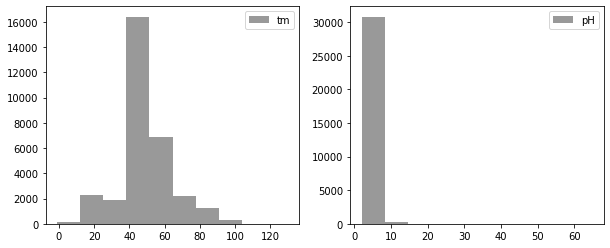

In [13]:
# bins=df['tm'].quantile([0,.05,0.1,0.15,0.20,0.25,0.3,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]).to_list()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].hist(df['tm'], alpha=0.8, color='gray', label="tm")
ax[1].hist(df['pH'], alpha=0.8, color='gray', label="pH")
ax[0].legend();
ax[1].legend();

In [14]:
# remove null values, 
# remove pH>max,
# remove duplicates, 
# look at the unique length values of the sequences 

In [15]:
df.drop_duplicates(subset=['protein_sequence','pH','tm'],inplace=True)

In [16]:
df.shape

(31332, 5)

In [17]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [18]:
columns_ = ['seq_id', 'protein_sequence', 'pH', 'tm']
df_ = df[df['pH'] <= 14][columns_].dropna()

In [19]:
print ("Columns in data:", df_.columns)
print ("Data dimensions:", df_.shape)
print ("Data types: \n", df_.dtypes)
print ("")

Columns in data: Index(['seq_id', 'protein_sequence', 'pH', 'tm'], dtype='object')
Data dimensions: (31017, 4)
Data types: 
 seq_id                int64
protein_sequence     object
pH                  float64
tm                  float64
dtype: object



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31332 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31332 non-null  int64  
 1   protein_sequence  31332 non-null  object 
 2   pH                31046 non-null  float64
 3   data_source       27986 non-null  object 
 4   tm                31332 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [21]:
pd.isnull(df_).sum()

seq_id              0
protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [22]:
np.sort(df_['pH'].unique())

array([ 1.99,  2.  ,  2.02,  2.03,  2.1 ,  2.2 ,  2.3 ,  2.34,  2.4 ,
        2.5 ,  2.53,  2.7 ,  2.8 ,  2.81,  2.83,  2.84,  2.86,  2.9 ,
        2.94,  2.98,  3.  ,  3.01,  3.02,  3.04,  3.07,  3.1 ,  3.14,
        3.15,  3.16,  3.19,  3.2 ,  3.21,  3.25,  3.3 ,  3.5 ,  3.6 ,
        3.7 ,  3.75,  3.8 ,  3.9 ,  4.  ,  4.1 ,  4.2 ,  4.25,  4.3 ,
        4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.75,  4.8 ,  4.9 ,  5.  ,  5.1 ,
        5.2 ,  5.28,  5.3 ,  5.31,  5.35,  5.38,  5.4 ,  5.42,  5.45,
        5.5 ,  5.6 ,  5.7 ,  5.8 ,  5.9 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,
        6.4 ,  6.5 ,  6.6 ,  6.7 ,  6.78,  6.8 ,  6.9 ,  7.  ,  7.1 ,
        7.2 ,  7.3 ,  7.4 ,  7.5 ,  7.6 ,  7.7 ,  7.8 ,  8.  ,  8.1 ,
        8.2 ,  8.25,  8.3 ,  8.4 ,  8.5 ,  8.6 ,  8.7 ,  9.  ,  9.08,
        9.2 ,  9.5 ,  9.6 ,  9.7 ,  9.75,  9.9 , 10.  , 10.3 , 10.4 ,
       11.  ])

In [23]:
df_[['protein_sequence', 'pH', 'tm']].describe().T

,count,mean,std,min,25%,50%,75%,max
pH,31017.0,6.854615,0.851209,1.99,7.0,7.0,7.0,11.0
tm,31017.0,49.174952,13.980854,-1.00,42.1,48.1,53.8,130.0


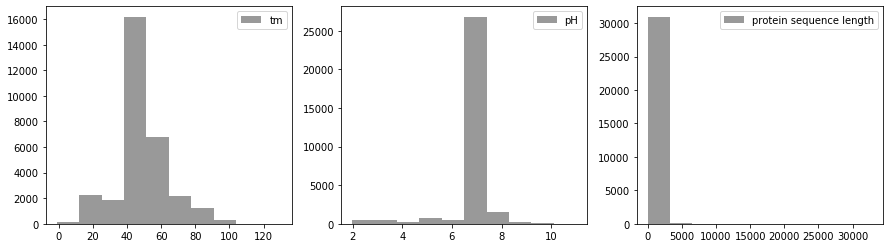

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax[0].hist(df_['tm'], alpha=0.8, color='gray', label="tm")
ax[1].hist(df_['pH'], alpha=0.8, color='gray', label="pH")
ax[2].hist(df_['protein_sequence'].str.len(), alpha=0.8, color='gray', label="protein sequence length")
ax[0].legend();
ax[1].legend();
ax[2].legend();

In [25]:
df_.head()

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5


In [26]:
df_['protein_sequence'].str.len().describe()

count    31017.000000
mean       449.703969
std        644.148182
min          5.000000
25%        197.000000
50%        337.000000
75%        527.000000
max      32767.000000
Name: protein_sequence, dtype: float64

In [27]:
# is this length > 1000 for protein sequence normal? Is this bad data, or are these from mutated proteins? 
df_[df_["protein_sequence"].str.len()>=1000].shape

(2072, 4)

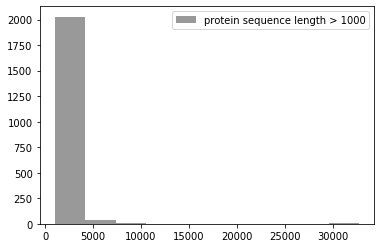

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.hist(df_[df_["protein_sequence"].str.len()>=1000]["protein_sequence"].str.len(), alpha=0.8, color='gray', label="protein sequence length > 1000")
ax.legend();

<br><BR/>

### Investigating the Protein Sequence 

In [29]:
df_['protein_sequence'][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

In [30]:
amino_acid_counts = df_['protein_sequence'].str.split('').explode().value_counts().drop('')

In [31]:
amino_acid_counts.shape

(20,)

In [32]:
amino_acid_counts

L    1309177
A    1066946
E    1017433
S    1002102
G     930841
V     910918
K     880741
D     775574
T     752482
R     741451
I     739308
P     701945
Q     606611
N     587624
F     516586
Y     413086
M     320709
H     313171
C     206002
W     155761
Name: protein_sequence, dtype: int64

In [33]:
amino_acids = amino_acid_counts.index.to_list()

In [34]:
print (type(amino_acid_counts))
print (amino_acid_counts.index)
print (amino_acids)

<class 'pandas.core.series.Series'>
Index(['L', 'A', 'E', 'S', 'G', 'V', 'K', 'D', 'T', 'R', 'I', 'P', 'Q', 'N',
       'F', 'Y', 'M', 'H', 'C', 'W'],
      dtype='object')
['L', 'A', 'E', 'S', 'G', 'V', 'K', 'D', 'T', 'R', 'I', 'P', 'Q', 'N', 'F', 'Y', 'M', 'H', 'C', 'W']


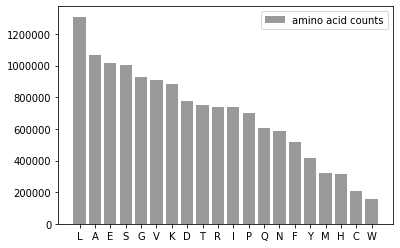

In [35]:
plt.bar(amino_acid_counts.index, alpha=0.8, color='gray', height=amino_acid_counts, label="amino acid counts")
plt.legend()

<br> <Br/> 

## 2. Feature Engineering

In [36]:
# adding the protein sequence length as a column 
# adding amino acids as columns with their numbers per row 
# adding how many different types of amino acids in a sequence as a column? 

df_['protein_sequence_length'] = df_['protein_sequence'].str.len()
for amino_acid in amino_acids:
    df_[amino_acid] = df_['protein_sequence'].str.count(amino_acid)

In [37]:
df_.head()

,seq_id,protein_sequence,pH,tm,protein_sequence_length,L,A,E,S,G,...,I,P,Q,N,F,Y,M,H,C,W
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,37,45,30,11,38,...,14,18,6,5,13,3,8,3,1,4
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,23,28,52,14,18,...,13,8,22,6,6,3,2,4,0,3
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,18,50,32,33,65,...,16,20,25,15,21,16,6,11,9,3
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,28,20,29,16,16,...,10,16,9,9,12,4,2,7,5,3
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,104,86,78,148,84,...,71,128,54,65,32,47,31,40,14,16


<p><p/>

### Example 

In [39]:
# adding biophysical properties as columns. These need to be calculated, for which one can use biopython package 

In [38]:
# finding out the properties of an example data point: 
ex = ProteinAnalysis(df_['protein_sequence'][0])

In [39]:
print ("aromaticity: ", ex.aromaticity())
print ("charge at pH: ", ex.charge_at_pH(df_['pH'][0]))
print ("gravy: ", ex.gravy())
print ("instability_index: ", ex.instability_index())
print ("isoelectric_point: ", ex.isoelectric_point())
print ("molecular weight: ", ex.molecular_weight())
print ("molar_extinction_coefficient: ", ex.molar_extinction_coefficient())
print ("secondary_structure_fraction: ", ex.secondary_structure_fraction())
print ("")
print ("flexibility: \n", ex.flexibility())

aromaticity:  0.05865102639296188
charge at pH:  -1.8728511025479264
gravy:  0.14809384164222864
instability_index:  28.389736070381236
isoelectric_point:  6.109589195251464
molecular weight:  36320.724400000036
molar_extinction_coefficient:  (26470, 26470)
secondary_structure_fraction:  (0.31671554252199413, 0.21114369501466276, 0.3519061583577713)

flexibility: 
 [0.9816666666666666, 0.9981785714285716, 0.9898809523809523, 0.9704999999999999, 0.9819404761904762, 0.9628214285714287, 0.9760119047619049, 1.0047499999999998, 1.0168809523809526, 0.9957380952380952, 1.0287976190476191, 1.0299285714285717, 0.9851428571428571, 0.9971428571428572, 1.0075238095238095, 0.9515595238095239, 0.9634761904761905, 0.971297619047619, 0.9918571428571429, 0.9662142857142858, 0.9900714285714285, 0.966595238095238, 1.0110833333333333, 1.0017380952380952, 0.9958095238095238, 0.9619642857142856, 0.9959285714285715, 0.9597738095238096, 0.9676309523809523, 0.9887619047619047, 0.9695238095238095, 1.02913095238

In [40]:
print ("molar_extinction_coefficient 0, with reduced cysteins: ", ex.molar_extinction_coefficient()[0])
print ("molar_extinction_coefficient 1, with disulfied bridges: ", ex.molar_extinction_coefficient()[1])
print ("secondary_structure_fraction 0, helix: ", ex.secondary_structure_fraction()[0])
print ("secondary_structure_fraction 1, turn: ", ex.secondary_structure_fraction()[1])
print ("secondary_structure_fraction 2, sheet: ", ex.secondary_structure_fraction()[2])

molar_extinction_coefficient 0, with reduced cysteins:  26470
molar_extinction_coefficient 1, with disulfied bridges:  26470
secondary_structure_fraction 0, helix:  0.31671554252199413
secondary_structure_fraction 1, turn:  0.21114369501466276
secondary_structure_fraction 2, sheet:  0.3519061583577713


<p><p/>

### Generating new features from the dataframe

In [41]:
def apply_protein_analysis(data, analysis_type):
    temp = ProteinAnalysis(data['protein_sequence'])
    if analysis_type == "aromaticity":
        return temp.aromaticity()
    elif analysis_type == "gravy":
        return temp.gravy()
    elif analysis_type == "instability_index":
        return temp.instability_index()
    elif analysis_type == "isoelectric_point":
        return temp.isoelectric_point()
    elif analysis_type == "molecular_weight":
        return temp.molecular_weight()
    elif analysis_type == "molar_extinction_coefficient_reduced cysteins":
        return temp.molar_extinction_coefficient()[0]
    elif analysis_type == "molar_extinction_coefficient_disulfied bridges":
        return temp.molar_extinction_coefficient()[1]
    elif analysis_type == "secondary_structure_fraction_helix":
        return temp.secondary_structure_fraction()[0]
    elif analysis_type == "secondary_structure_fraction_turn":
        return temp.secondary_structure_fraction()[1]
    elif analysis_type == "secondary_structure_fraction_sheet":
        return temp.secondary_structure_fraction()[2]
    elif analysis_type == "flexibility":
        return temp.flexibility()
    else:
        return None 
    
def apply_charge_at_pH(data1, data2):
    temp = ProteinAnalysis(data1)
    return temp.charge_at_pH(data2)

def apply_aromaticity(data):
    temp = ProteinAnalysis(data['protein_sequence'])
    return temp.aromaticity()

In [42]:
ProteinAnalysis(df['protein_sequence'][4]).aromaticity()

0.06547208821502412

In [43]:
df_.apply(apply_aromaticity, axis=1)

0        0.058651
1        0.041958
2        0.080483
3        0.071698
4        0.065472
           ...   
31385    0.089253
31386    0.087420
31387    0.117188
31388    0.074199
31389    0.135940
Length: 31017, dtype: float64

In [44]:
analysis_types = ['aromaticity', 'gravy', 'instability_index', 'isoelectric_point', 'molecular_weight',
                  'molar_extinction_coefficient_reduced cysteins', 'molar_extinction_coefficient_disulfied bridges', 
                  'secondary_structure_fraction_helix', 'secondary_structure_fraction_turn', 'secondary_structure_fraction_sheet',
                  'flexibility'] # 
for analysis_type in analysis_types:
    df_[analysis_type] = df_.apply(apply_protein_analysis, axis=1, analysis_type=analysis_type)

In [45]:
# this requires two mappings for two columns 
df_['charge_at_pH'] =  df_.apply(lambda x: apply_charge_at_pH(x.protein_sequence, x.pH), axis=1)

In [46]:
df_.head()

,seq_id,protein_sequence,pH,tm,protein_sequence_length,L,A,E,S,G,...,instability_index,isoelectric_point,molecular_weight,molar_extinction_coefficient_reduced cysteins,molar_extinction_coefficient_disulfied bridges,secondary_structure_fraction_helix,secondary_structure_fraction_turn,secondary_structure_fraction_sheet,flexibility,charge_at_pH
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,37,45,30,11,38,...,28.389736,6.109589,36320.7244,26470,26470,0.316716,0.211144,0.351906,"[0.9816666666666666, 0.9981785714285716, 0.989...",-1.872851
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,23,28,52,14,18,...,65.108392,5.144349,32837.9931,20970,20970,0.213287,0.160839,0.367133,"[1.0370119047619046, 1.018095238095238, 1.0032...",-12.720355
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,18,50,32,33,65,...,35.089336,9.032101,53428.8034,40340,40840,0.209256,0.267606,0.213280,"[0.987547619047619, 1.0112976190476188, 0.9999...",11.730622
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,28,20,29,16,16,...,50.502264,4.683840,29475.5996,22460,22710,0.267925,0.215094,0.298113,"[0.9806190476190478, 1.0057738095238096, 0.990...",-20.561692
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,104,86,78,148,84,...,45.668808,5.917928,158761.9814,158030,158905,0.271537,0.292901,0.206065,"[1.0195714285714286, 1.0309166666666667, 1.038...",-21.664651


In [47]:
df_.columns

Index(['seq_id', 'protein_sequence', 'pH', 'tm', 'protein_sequence_length',
       'L', 'A', 'E', 'S', 'G', 'V', 'K', 'D', 'T', 'R', 'I', 'P', 'Q', 'N',
       'F', 'Y', 'M', 'H', 'C', 'W', 'aromaticity', 'gravy',
       'instability_index', 'isoelectric_point', 'molecular_weight',
       'molar_extinction_coefficient_reduced cysteins',
       'molar_extinction_coefficient_disulfied bridges',
       'secondary_structure_fraction_helix',
       'secondary_structure_fraction_turn',
       'secondary_structure_fraction_sheet', 'flexibility', 'charge_at_pH'],
      dtype='object')

<br><br/>

## 3. Save the new dataframe

In [48]:
df_.to_csv("data/train_feature_engineered.csv", index=False)

<p><p/>